# Step 4 - Perform Word Counts for each group to rank terms

The 4 corpora used for TFIDF creation are:
- NMF Abstracts (2015)
- Non-NMF Abstracts (2,224)
- NMF Full Texts (283)
- Non-NMF Full Texts (3497)

## 4.1 - Abstracts NMF Corpus

In [1]:
import functions

In [2]:
dict_path = "/Users/manojarachige/Library/CloudStorage/Dropbox/Mac/Documents/Coding/Projects/BMedScDOC2021/BMedScDOC_2023/Dictionaries/aalbi_dictionary.txt"
corpus_dir = "/Users/manojarachige/Library/CloudStorage/Dropbox/Mac/Documents/Coding/Projects/BMedScDOC2021/BMedScDOC_2023/Assets/Abstracts_TM"
replacement_path = "/Users/manojarachige/Library/CloudStorage/Dropbox/Mac/Documents/Coding/Projects/BMedScDOC2021/BMedScDOC_2023/Dictionaries/aalbi.csv"

In [3]:
#define the lists we'll need for outputs

dictionary = []

combined = [] #For pathway 2 - total dictionary list

docs = []

In [5]:
doc_list = functions.os_level.get_corpus(corpus_dir, "txt")

In [6]:
print("We have a total of {} documents".format(len(doc_list)))

We have a total of 2015 documents


In [7]:
dictionary = functions.os_level.makedict(dict_path)

In [8]:
def action(i, doc_list, dictionary):
    
    text = maketxt("{}".format(corpus_dir) + "/{}".format(doc_list[i]), replacement_path)
        
    #remove non-dictionary words
    text = rem_dict(dictionary,text) 
        
    #add to Total List for Combined BoW later
    combined.extend(text) 
        
    #check corpus doc again
        
    #add to list of text strings for tdm
    doc_for_tdm = " ".join(text)
    docs.append(doc_for_tdm)
    
    
    
#Create list of words appearing in txt file 
def maketxt(text, csv_path):
    string = ''
    with open(text) as file:
        string = file.read()
        return functions.processing.preprocess(string, csv_path)
    
#Remove words not in the dictionary NOTE: Will find words within words ie. bar within bars
def rem_dict(dictionary, doc):
    new_doc = []
    for i in range(len(doc)):
        for j in range(len(dictionary)):
            if dictionary[j] in doc[i]:
                new_doc.append(dictionary[j])
    return new_doc

In [9]:
for i in range(len(doc_list)):
            action(i, doc_list, dictionary)

In [10]:
save_location = "/Users/manojarachige/Downloads/"

import pandas as pd

def display(combined, csv_path):
    df = pd.read_csv(csv_path)
    for i in range(len(df)): #python replace items in a loop
        for j in range(len(combined)):
            if df["Replacement"][i] == combined[j]:
                combined[j] = df["Display"][i]
    return combined

In [11]:
#output 1
df = functions.outputs.tdm_make(docs)
df.to_csv(r'{}TDM.csv'.format(save_location))

Total>>> [('thalamus', 174), ('cuneus', 56), ('precuneus', 54), ('cerebellum', 44), ('posterior cingulate', 39), ('anterior cingulate', 29), ('hippocampus', 24), ('caudate nucleus', 11), ('amygdala', 11), ('superior temporal gyrus', 8), ('inferior parietal lobule', 7), ('middle frontal gyrus', 7), ('pallidum', 6), ('postcentral gyrus', 5), ('superior frontal gyrus', 4), ('fusiform gyrus', 4), ('supplementary motor area', 4), ('parahippocampal', 3), ('supramarginal gyrus', 3), ('rolandic operculum', 3), ('middle cingulate', 3), ('temporal pole: superior temporal gyrus', 3), ('vermis', 2), ('middle temporal gyrus', 2), ('superior parietal lobule', 2), ('middle occipital gyrus', 2), ('paracentral lobule', 2), ('calcarine', 2), ('inferior temporal gyrus', 2), ('putamen', 1)]


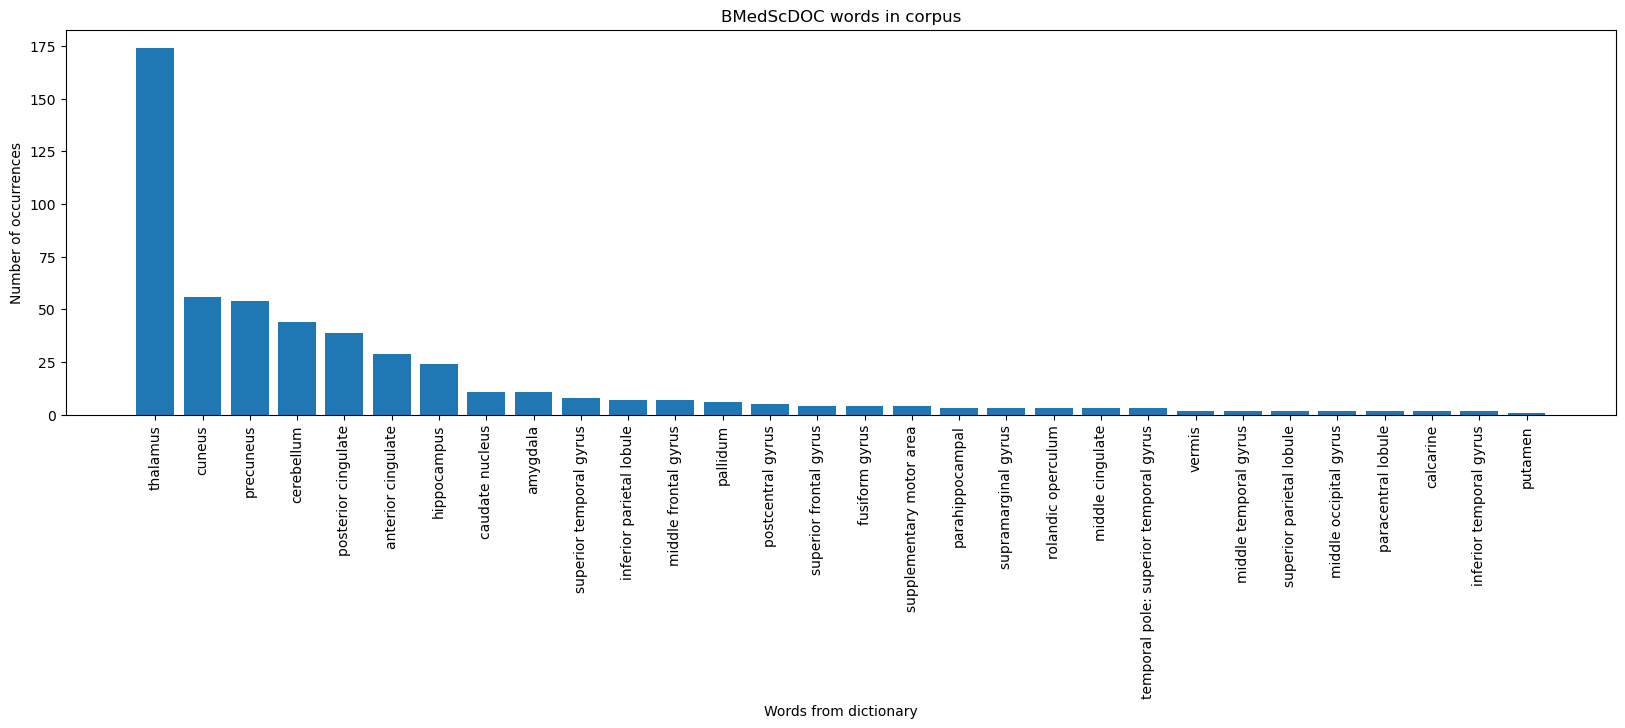

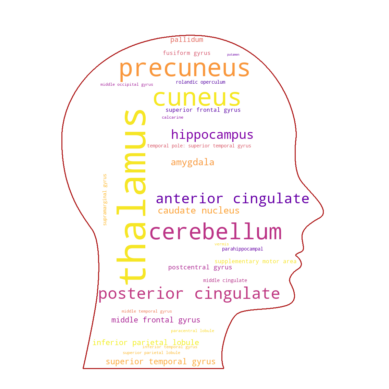

In [12]:
for_display = display(combined, replacement_path)

#output 2
functions.outputs.barchart(for_display, save_location)

#output 3
functions.outputs.wc(for_display)

In [14]:
total = [('thalamus', 174), ('cuneus', 56), ('precuneus', 54), ('cerebellum', 44), ('posterior cingulate', 39), ('anterior cingulate', 29), ('hippocampus', 24), ('caudate nucleus', 11), ('amygdala', 11), ('superior temporal gyrus', 8), ('inferior parietal lobule', 7), ('middle frontal gyrus', 7), ('pallidum', 6), ('postcentral gyrus', 5), ('superior frontal gyrus', 4), ('fusiform gyrus', 4), ('supplementary motor area', 4), ('parahippocampal', 3), ('supramarginal gyrus', 3), ('rolandic operculum', 3), ('middle cingulate', 3), ('temporal pole: superior temporal gyrus', 3), ('vermis', 2), ('middle temporal gyrus', 2), ('superior parietal lobule', 2), ('middle occipital gyrus', 2), ('paracentral lobule', 2), ('calcarine', 2), ('inferior temporal gyrus', 2), ('putamen', 1)]
len(total)

30

In [15]:
total

[('thalamus', 174),
 ('cuneus', 56),
 ('precuneus', 54),
 ('cerebellum', 44),
 ('posterior cingulate', 39),
 ('anterior cingulate', 29),
 ('hippocampus', 24),
 ('caudate nucleus', 11),
 ('amygdala', 11),
 ('superior temporal gyrus', 8),
 ('inferior parietal lobule', 7),
 ('middle frontal gyrus', 7),
 ('pallidum', 6),
 ('postcentral gyrus', 5),
 ('superior frontal gyrus', 4),
 ('fusiform gyrus', 4),
 ('supplementary motor area', 4),
 ('parahippocampal', 3),
 ('supramarginal gyrus', 3),
 ('rolandic operculum', 3),
 ('middle cingulate', 3),
 ('temporal pole: superior temporal gyrus', 3),
 ('vermis', 2),
 ('middle temporal gyrus', 2),
 ('superior parietal lobule', 2),
 ('middle occipital gyrus', 2),
 ('paracentral lobule', 2),
 ('calcarine', 2),
 ('inferior temporal gyrus', 2),
 ('putamen', 1)]

## 4.2 - Abstracts Non-NMF Corpus

In [1]:
import functions

In [2]:
dict_path = "/Users/manojarachige/Library/CloudStorage/Dropbox/Mac/Documents/Coding/Projects/BMedScDOC2021/BMedScDOC_2023/Dictionaries/aalbi_dictionary.txt"
corpus_dir = "/Users/manojarachige/Library/CloudStorage/Dropbox/Mac/Documents/Coding/Projects/BMedScDOC2021/BMedScDOC_2023/Assets/Abstracts_NON_TM"
replacement_path = "/Users/manojarachige/Library/CloudStorage/Dropbox/Mac/Documents/Coding/Projects/BMedScDOC2021/BMedScDOC_2023/Dictionaries/aalbi.csv"

In [3]:
#define the lists we'll need for outputs

dictionary = []

combined = [] #For pathway 2 - total dictionary list

docs = []

In [4]:
doc_list = functions.os_level.get_corpus(corpus_dir, "txt")

In [5]:
print("We have a total of {} documents".format(len(doc_list)))

We have a total of 22223 documents


In [6]:
dictionary = functions.os_level.makedict(dict_path)

In [7]:
def action(i, doc_list, dictionary):
    
    text = maketxt("{}".format(corpus_dir) + "/{}".format(doc_list[i]), replacement_path)
        
    #remove non-dictionary words
    text = rem_dict(dictionary,text) 
        
    #add to Total List for Combined BoW later
    combined.extend(text) 
        
    #check corpus doc again
        
    #add to list of text strings for tdm
    doc_for_tdm = " ".join(text)
    docs.append(doc_for_tdm)
    
    
    
#Create list of words appearing in txt file 
def maketxt(text, csv_path):
    string = ''
    with open(text) as file:
        string = file.read()
        return functions.processing.preprocess(string, csv_path)
    
#Remove words not in the dictionary NOTE: Will find words within words ie. bar within bars
def rem_dict(dictionary, doc):
    new_doc = []
    for i in range(len(doc)):
        for j in range(len(dictionary)):
            if dictionary[j] in doc[i]:
                new_doc.append(dictionary[j])
    return new_doc

In [8]:
for i in range(len(doc_list)):
            action(i, doc_list, dictionary)

In [9]:
save_location = "/Users/manojarachige/Downloads/"

import pandas as pd

def display(combined, csv_path):
    df = pd.read_csv(csv_path)
    for i in range(len(df)): #python replace items in a loop
        for j in range(len(combined)):
            if df["Replacement"][i] == combined[j]:
                combined[j] = df["Display"][i]
    return combined

In [10]:
#output 1
df = functions.outputs.tdm_make(docs)
df.to_csv(r'{}TDM.csv'.format(save_location))

Total>>> [('thalamus', 386), ('cerebellum', 180), ('hippocampus', 123), ('amygdala', 94), ('anterior cingulate', 52), ('cuneus', 52), ('posterior cingulate', 48), ('caudate nucleus', 47), ('precuneus', 46), ('fusiform gyrus', 25), ('superior temporal gyrus', 19), ('supplementary motor area', 17), ('inferior parietal lobule', 14), ('vermis', 12), ('parahippocampal', 12), ('supramarginal gyrus', 12), ('superior parietal lobule', 11), ('middle temporal gyrus', 11), ('superior frontal gyrus', 10), ('inferior frontal gyrus, opercular part', 9), ('paracentral lobule', 9), ('putamen', 8), ('postcentral gyrus', 8), ('inferior temporal gyrus', 7), ('middle frontal gyrus', 7), ('pallidum', 6), ('middle occipital gyrus', 6), ('rolandic operculum', 5), ('middle cingulate', 5), ('lateral orbital gyrus', 4), ('temporal pole: superior temporal gyrus', 3), ('inferior frontal gyrus, triangular part', 3), ("heschl's gyrus", 3), ('calcarine', 1), ('inferior occipital gyrus', 1)]


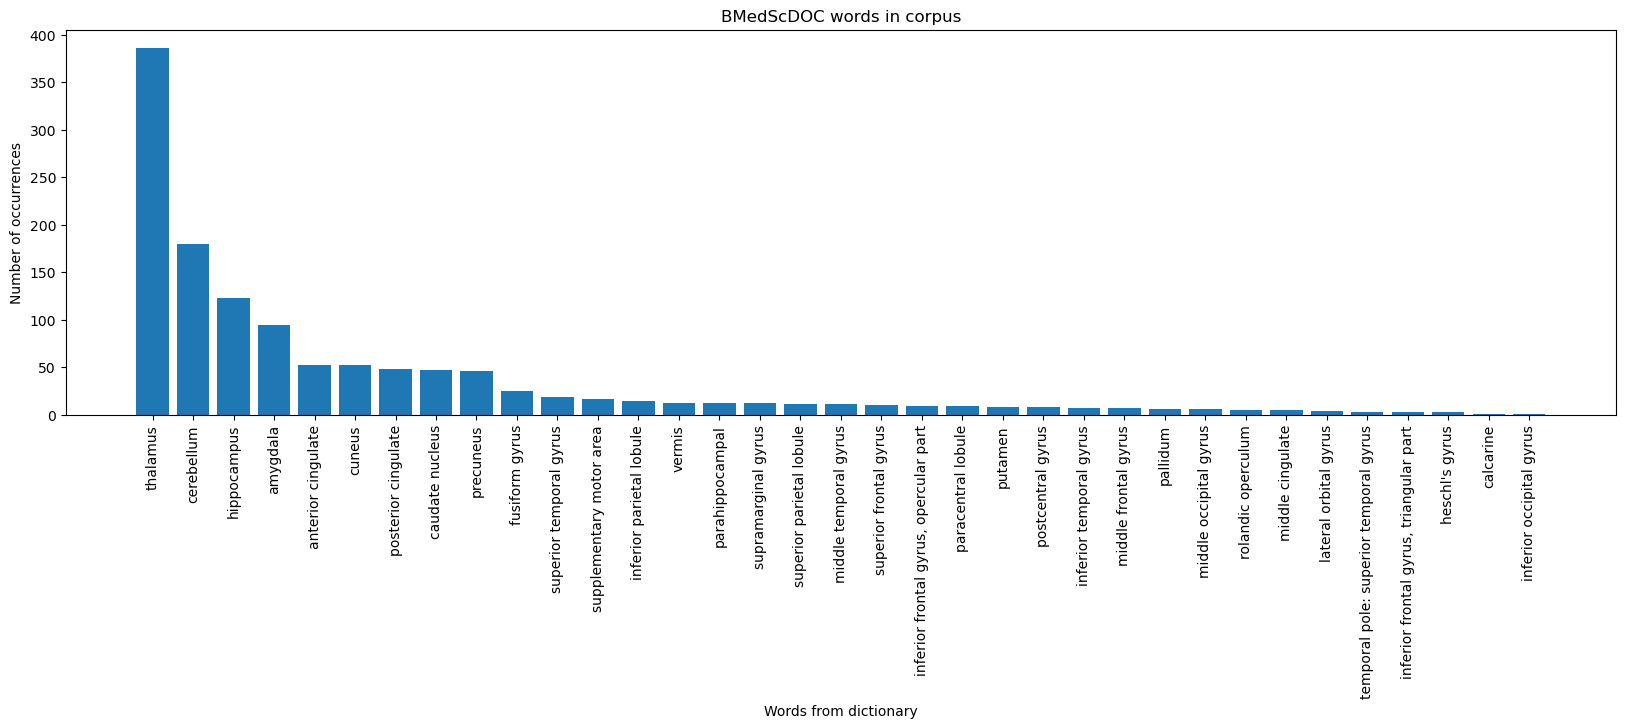

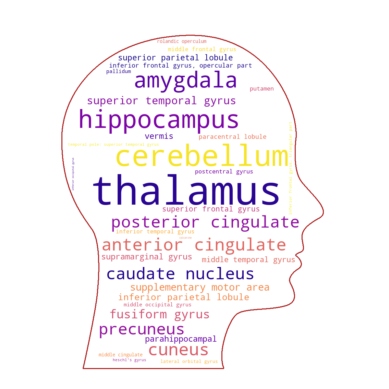

In [11]:
for_display = display(combined, replacement_path)

#output 2
functions.outputs.barchart(for_display, save_location)

#output 3
functions.outputs.wc(for_display)

In [12]:
total = [('thalamus', 386), ('cerebellum', 180), ('hippocampus', 123), ('amygdala', 94), ('anterior cingulate', 52), ('cuneus', 52), ('posterior cingulate', 48), ('caudate nucleus', 47), ('precuneus', 46), ('fusiform gyrus', 25), ('superior temporal gyrus', 19), ('supplementary motor area', 17), ('inferior parietal lobule', 14), ('vermis', 12), ('parahippocampal', 12), ('supramarginal gyrus', 12), ('superior parietal lobule', 11), ('middle temporal gyrus', 11), ('superior frontal gyrus', 10), ('inferior frontal gyrus, opercular part', 9), ('paracentral lobule', 9), ('putamen', 8), ('postcentral gyrus', 8), ('inferior temporal gyrus', 7), ('middle frontal gyrus', 7), ('pallidum', 6), ('middle occipital gyrus', 6), ('rolandic operculum', 5), ('middle cingulate', 5), ('lateral orbital gyrus', 4), ('temporal pole: superior temporal gyrus', 3), ('inferior frontal gyrus, triangular part', 3), ("heschl's gyrus", 3), ('calcarine', 1), ('inferior occipital gyrus', 1)]
len(total)

35

In [13]:
total

[('thalamus', 386),
 ('cerebellum', 180),
 ('hippocampus', 123),
 ('amygdala', 94),
 ('anterior cingulate', 52),
 ('cuneus', 52),
 ('posterior cingulate', 48),
 ('caudate nucleus', 47),
 ('precuneus', 46),
 ('fusiform gyrus', 25),
 ('superior temporal gyrus', 19),
 ('supplementary motor area', 17),
 ('inferior parietal lobule', 14),
 ('vermis', 12),
 ('parahippocampal', 12),
 ('supramarginal gyrus', 12),
 ('superior parietal lobule', 11),
 ('middle temporal gyrus', 11),
 ('superior frontal gyrus', 10),
 ('inferior frontal gyrus, opercular part', 9),
 ('paracentral lobule', 9),
 ('putamen', 8),
 ('postcentral gyrus', 8),
 ('inferior temporal gyrus', 7),
 ('middle frontal gyrus', 7),
 ('pallidum', 6),
 ('middle occipital gyrus', 6),
 ('rolandic operculum', 5),
 ('middle cingulate', 5),
 ('lateral orbital gyrus', 4),
 ('temporal pole: superior temporal gyrus', 3),
 ('inferior frontal gyrus, triangular part', 3),
 ("heschl's gyrus", 3),
 ('calcarine', 1),
 ('inferior occipital gyrus', 1)]

## 4.3 - Full Texts NMF Corpus

In [1]:
import functions

In [2]:
dict_path = "/Users/manojarachige/Library/CloudStorage/Dropbox/Mac/Documents/Coding/Projects/BMedScDOC2021/BMedScDOC_2023/Dictionaries/aalbi_dictionary.txt"
corpus_dir = "/Users/manojarachige/Library/CloudStorage/Dropbox/Mac/Documents/Coding/Projects/BMedScDOC2021/BMedScDOC_2023/Assets/FullTexts_TM"
replacement_path = "/Users/manojarachige/Library/CloudStorage/Dropbox/Mac/Documents/Coding/Projects/BMedScDOC2021/BMedScDOC_2023/Dictionaries/aalbi.csv"

In [3]:
#define the lists we'll need for outputs

dictionary = []

combined = [] #For pathway 2 - total dictionary list

docs = []

In [4]:
doc_list = functions.os_level.get_corpus(corpus_dir, "txt")

In [5]:
print("We have a total of {} documents".format(len(doc_list)))

We have a total of 283 documents


In [6]:
dictionary = functions.os_level.makedict(dict_path)

In [7]:
def action(i, doc_list, dictionary):
    
    text = maketxt("{}".format(corpus_dir) + "/{}".format(doc_list[i]), replacement_path)
        
    #remove non-dictionary words
    text = rem_dict(dictionary,text) 
        
    #add to Total List for Combined BoW later
    combined.extend(text) 
        
    #check corpus doc again
        
    #add to list of text strings for tdm
    doc_for_tdm = " ".join(text)
    docs.append(doc_for_tdm)
    
    
    
#Create list of words appearing in txt file 
def maketxt(text, csv_path):
    string = ''
    with open(text) as file:
        string = file.read()
        return functions.processing.preprocess(string, csv_path)
    
#Remove words not in the dictionary NOTE: Will find words within words ie. bar within bars
def rem_dict(dictionary, doc):
    new_doc = []
    for i in range(len(doc)):
        for j in range(len(dictionary)):
            if dictionary[j] in doc[i]:
                new_doc.append(dictionary[j])
    return new_doc

In [8]:
for i in range(len(doc_list)):
            action(i, doc_list, dictionary)

In [9]:
save_location = "/Users/manojarachige/Downloads/"

import pandas as pd

def display(combined, csv_path):
    df = pd.read_csv(csv_path)
    for i in range(len(df)): #python replace items in a loop
        for j in range(len(combined)):
            if df["Replacement"][i] == combined[j]:
                combined[j] = df["Display"][i]
    return combined

In [10]:
#output 1
df = functions.outputs.tdm_make(docs)
df.to_csv(r'{}TDM.csv'.format(save_location))

Total>>> [('thalamus', 625), ('cuneus', 248), ('precuneus', 232), ('cerebellum', 206), ('amygdala', 171), ('posterior cingulate', 140), ('hippocampus', 110), ('caudate nucleus', 104), ('anterior cingulate', 99), ('superior frontal gyrus', 81), ('pallidum', 78), ('middle frontal gyrus', 51), ('superior temporal gyrus', 50), ('inferior parietal lobule', 49), ('middle temporal gyrus', 44), ('supramarginal gyrus', 43), ('postcentral gyrus', 42), ('superior parietal lobule', 38), ('parahippocampal', 36), ('inferior temporal gyrus', 31), ('supplementary motor area', 27), ("heschl's gyrus", 19), ('fusiform gyrus', 15), ('calcarine', 15), ('inferior frontal gyrus, opercular part', 15), ('putamen', 14), ('inferior occipital gyrus', 10), ('middle cingulate', 9), ('inferior frontal gyrus, triangular part', 7), ('vermis', 7), ('paracentral lobule', 6), ('middle occipital gyrus', 6), ('temporal pole: superior temporal gyrus', 5), ('rolandic operculum', 5), ('posterior orbital gyrus', 5), ('superior

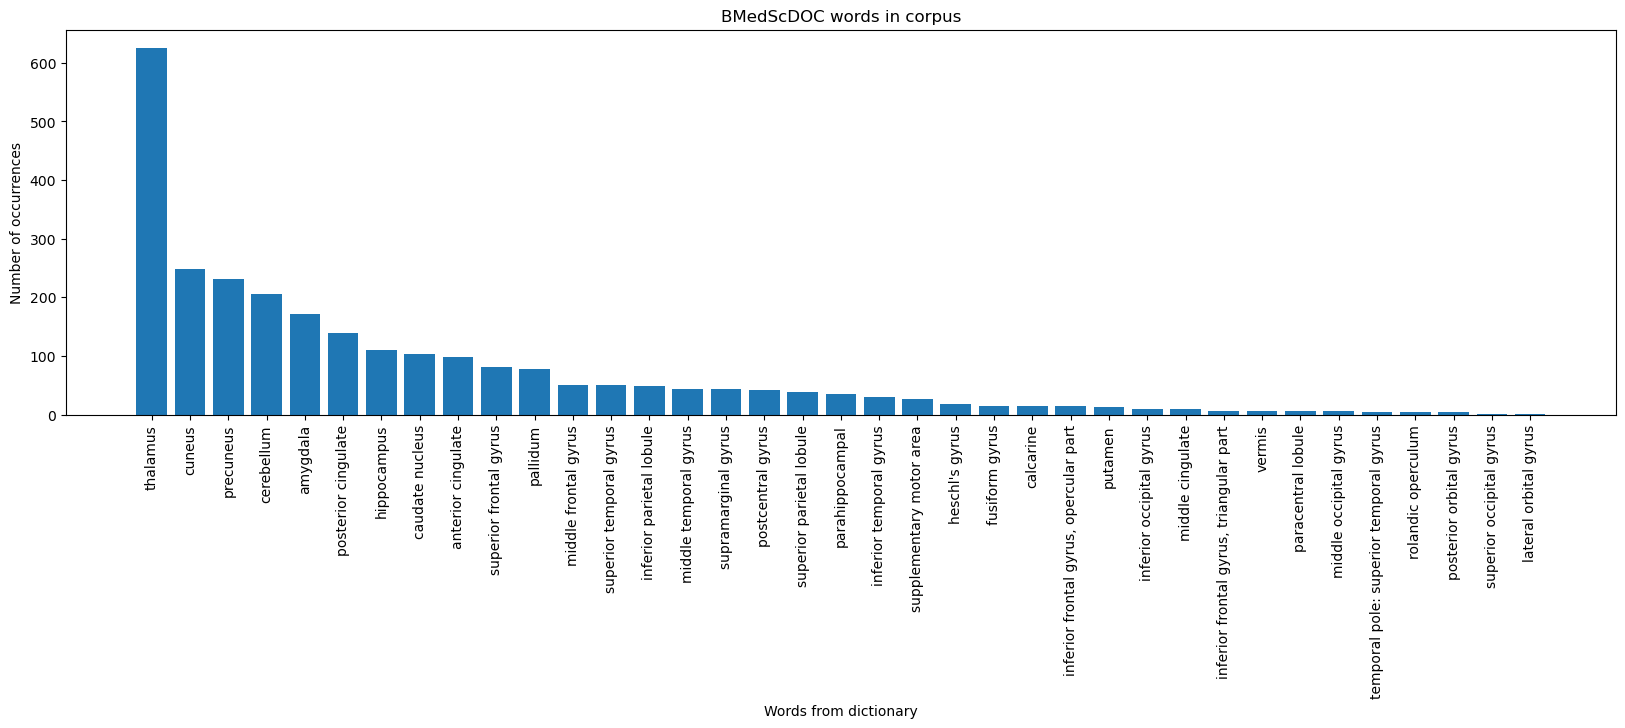

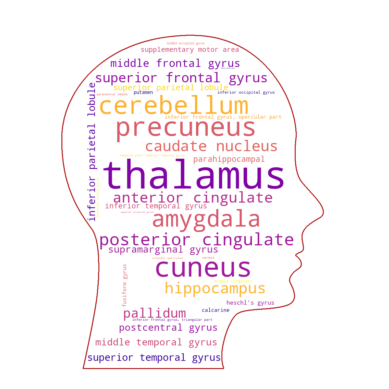

In [11]:
for_display = display(combined, replacement_path)

#output 2
functions.outputs.barchart(for_display, save_location)

#output 3
functions.outputs.wc(for_display)

In [12]:
total = [('thalamus', 625), ('cuneus', 248), ('precuneus', 232), ('cerebellum', 206), ('amygdala', 171), ('posterior cingulate', 140), ('hippocampus', 110), ('caudate nucleus', 104), ('anterior cingulate', 99), ('superior frontal gyrus', 81), ('pallidum', 78), ('middle frontal gyrus', 51), ('superior temporal gyrus', 50), ('inferior parietal lobule', 49), ('middle temporal gyrus', 44), ('supramarginal gyrus', 43), ('postcentral gyrus', 42), ('superior parietal lobule', 38), ('parahippocampal', 36), ('inferior temporal gyrus', 31), ('supplementary motor area', 27), ("heschl's gyrus", 19), ('fusiform gyrus', 15), ('calcarine', 15), ('inferior frontal gyrus, opercular part', 15), ('putamen', 14), ('inferior occipital gyrus', 10), ('middle cingulate', 9), ('inferior frontal gyrus, triangular part', 7), ('vermis', 7), ('paracentral lobule', 6), ('middle occipital gyrus', 6), ('temporal pole: superior temporal gyrus', 5), ('rolandic operculum', 5), ('posterior orbital gyrus', 5), ('superior occipital gyrus', 2), ('lateral orbital gyrus', 1)]
len(total)

37

In [13]:
total

[('thalamus', 625),
 ('cuneus', 248),
 ('precuneus', 232),
 ('cerebellum', 206),
 ('amygdala', 171),
 ('posterior cingulate', 140),
 ('hippocampus', 110),
 ('caudate nucleus', 104),
 ('anterior cingulate', 99),
 ('superior frontal gyrus', 81),
 ('pallidum', 78),
 ('middle frontal gyrus', 51),
 ('superior temporal gyrus', 50),
 ('inferior parietal lobule', 49),
 ('middle temporal gyrus', 44),
 ('supramarginal gyrus', 43),
 ('postcentral gyrus', 42),
 ('superior parietal lobule', 38),
 ('parahippocampal', 36),
 ('inferior temporal gyrus', 31),
 ('supplementary motor area', 27),
 ("heschl's gyrus", 19),
 ('fusiform gyrus', 15),
 ('calcarine', 15),
 ('inferior frontal gyrus, opercular part', 15),
 ('putamen', 14),
 ('inferior occipital gyrus', 10),
 ('middle cingulate', 9),
 ('inferior frontal gyrus, triangular part', 7),
 ('vermis', 7),
 ('paracentral lobule', 6),
 ('middle occipital gyrus', 6),
 ('temporal pole: superior temporal gyrus', 5),
 ('rolandic operculum', 5),
 ('posterior orbit

## 4.4 - Full Texts Non-NMF Corpus

In [1]:
import functions

In [2]:
dict_path = "/Users/manojarachige/Library/CloudStorage/Dropbox/Mac/Documents/Coding/Projects/BMedScDOC2021/BMedScDOC_2023/Dictionaries/aalbi_dictionary.txt"
corpus_dir = "/Users/manojarachige/Library/CloudStorage/Dropbox/Mac/Documents/Coding/Projects/BMedScDOC2021/BMedScDOC_2023/Assets/FullTexts_TM"
replacement_path = "/Users/manojarachige/Library/CloudStorage/Dropbox/Mac/Documents/Coding/Projects/BMedScDOC2021/BMedScDOC_2023/Dictionaries/aalbi.csv"

In [3]:
#define the lists we'll need for outputs

dictionary = []

combined = [] #For pathway 2 - total dictionary list

docs = []

In [4]:
doc_list = functions.os_level.get_corpus(corpus_dir, "txt")

In [5]:
print("We have a total of {} documents".format(len(doc_list)))

We have a total of 283 documents


In [6]:
dictionary = functions.os_level.makedict(dict_path)

In [7]:
def action(i, doc_list, dictionary):
    
    text = maketxt("{}".format(corpus_dir) + "/{}".format(doc_list[i]), replacement_path)
        
    #remove non-dictionary words
    text = rem_dict(dictionary,text) 
        
    #add to Total List for Combined BoW later
    combined.extend(text) 
        
    #check corpus doc again
        
    #add to list of text strings for tdm
    doc_for_tdm = " ".join(text)
    docs.append(doc_for_tdm)
    
    
    
#Create list of words appearing in txt file 
def maketxt(text, csv_path):
    string = ''
    with open(text) as file:
        string = file.read()
        return functions.processing.preprocess(string, csv_path)
    
#Remove words not in the dictionary NOTE: Will find words within words ie. bar within bars
def rem_dict(dictionary, doc):
    new_doc = []
    for i in range(len(doc)):
        for j in range(len(dictionary)):
            if dictionary[j] in doc[i]:
                new_doc.append(dictionary[j])
    return new_doc

In [8]:
for i in range(len(doc_list)):
            action(i, doc_list, dictionary)

In [9]:
save_location = "/Users/manojarachige/Downloads/"

import pandas as pd

def display(combined, csv_path):
    df = pd.read_csv(csv_path)
    for i in range(len(df)): #python replace items in a loop
        for j in range(len(combined)):
            if df["Replacement"][i] == combined[j]:
                combined[j] = df["Display"][i]
    return combined

In [10]:
#output 1
df = functions.outputs.tdm_make(docs)
df.to_csv(r'{}TDM.csv'.format(save_location))

Total>>> [('thalamus', 625), ('cuneus', 248), ('precuneus', 232), ('cerebellum', 206), ('amygdala', 171), ('posterior cingulate', 140), ('hippocampus', 110), ('caudate nucleus', 104), ('anterior cingulate', 99), ('superior frontal gyrus', 81), ('pallidum', 78), ('middle frontal gyrus', 51), ('superior temporal gyrus', 50), ('inferior parietal lobule', 49), ('middle temporal gyrus', 44), ('supramarginal gyrus', 43), ('postcentral gyrus', 42), ('superior parietal lobule', 38), ('parahippocampal', 36), ('inferior temporal gyrus', 31), ('supplementary motor area', 27), ("heschl's gyrus", 19), ('fusiform gyrus', 15), ('calcarine', 15), ('inferior frontal gyrus, opercular part', 15), ('putamen', 14), ('inferior occipital gyrus', 10), ('middle cingulate', 9), ('inferior frontal gyrus, triangular part', 7), ('vermis', 7), ('paracentral lobule', 6), ('middle occipital gyrus', 6), ('temporal pole: superior temporal gyrus', 5), ('rolandic operculum', 5), ('posterior orbital gyrus', 5), ('superior

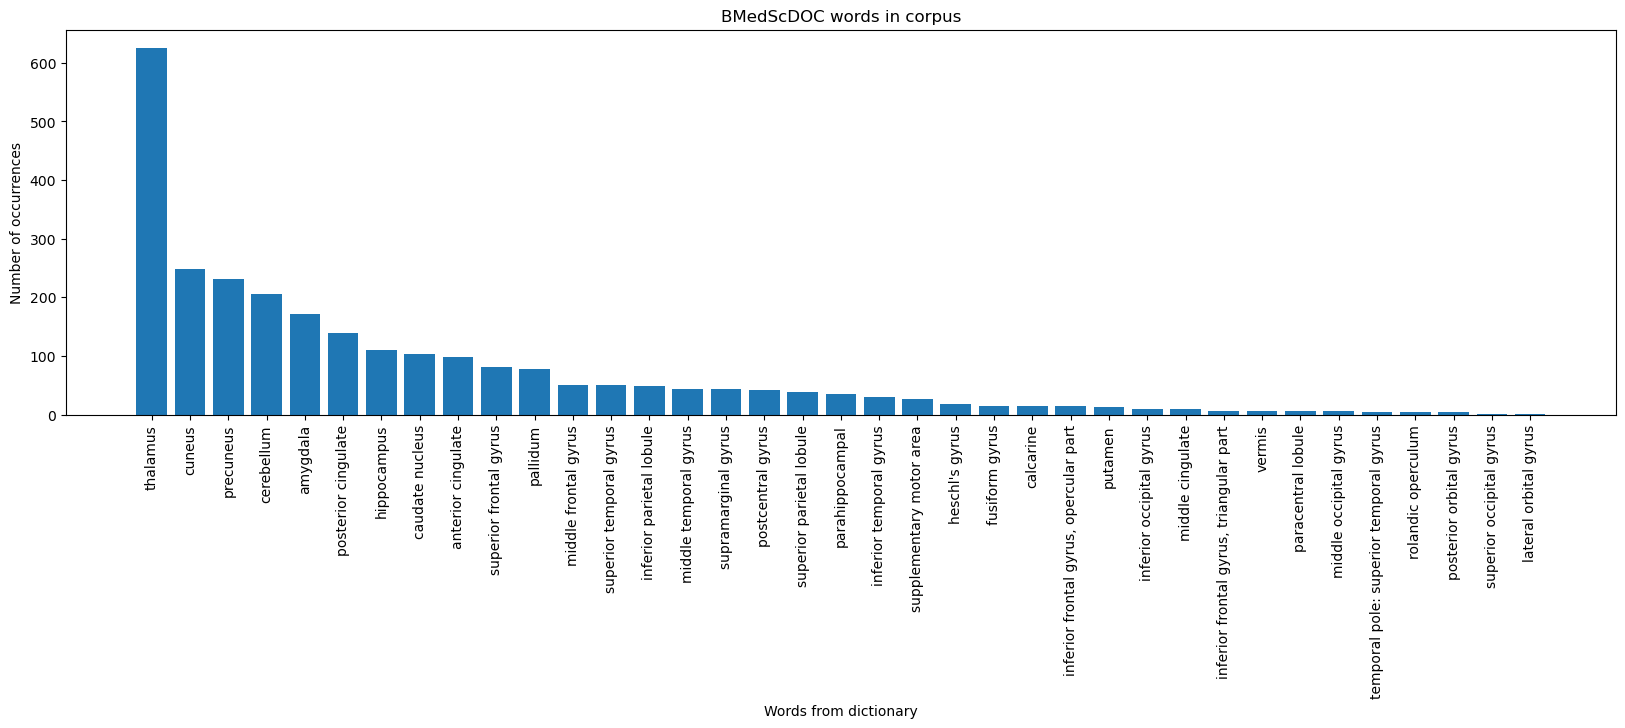

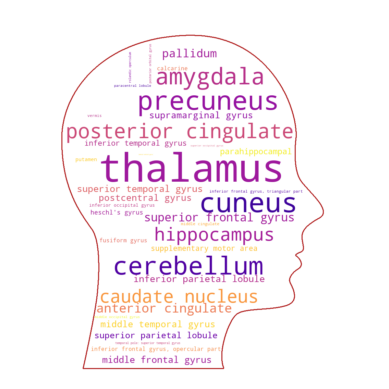

In [11]:
for_display = display(combined, replacement_path)

#output 2
functions.outputs.barchart(for_display, save_location)

#output 3
functions.outputs.wc(for_display)

In [12]:
total = [('thalamus', 625), ('cuneus', 248), ('precuneus', 232), ('cerebellum', 206), ('amygdala', 171), ('posterior cingulate', 140), ('hippocampus', 110), ('caudate nucleus', 104), ('anterior cingulate', 99), ('superior frontal gyrus', 81), ('pallidum', 78), ('middle frontal gyrus', 51), ('superior temporal gyrus', 50), ('inferior parietal lobule', 49), ('middle temporal gyrus', 44), ('supramarginal gyrus', 43), ('postcentral gyrus', 42), ('superior parietal lobule', 38), ('parahippocampal', 36), ('inferior temporal gyrus', 31), ('supplementary motor area', 27), ("heschl's gyrus", 19), ('fusiform gyrus', 15), ('calcarine', 15), ('inferior frontal gyrus, opercular part', 15), ('putamen', 14), ('inferior occipital gyrus', 10), ('middle cingulate', 9), ('inferior frontal gyrus, triangular part', 7), ('vermis', 7), ('paracentral lobule', 6), ('middle occipital gyrus', 6), ('temporal pole: superior temporal gyrus', 5), ('rolandic operculum', 5), ('posterior orbital gyrus', 5), ('superior occipital gyrus', 2), ('lateral orbital gyrus', 1)]
len(total)

37

In [13]:
total

[('thalamus', 625),
 ('cuneus', 248),
 ('precuneus', 232),
 ('cerebellum', 206),
 ('amygdala', 171),
 ('posterior cingulate', 140),
 ('hippocampus', 110),
 ('caudate nucleus', 104),
 ('anterior cingulate', 99),
 ('superior frontal gyrus', 81),
 ('pallidum', 78),
 ('middle frontal gyrus', 51),
 ('superior temporal gyrus', 50),
 ('inferior parietal lobule', 49),
 ('middle temporal gyrus', 44),
 ('supramarginal gyrus', 43),
 ('postcentral gyrus', 42),
 ('superior parietal lobule', 38),
 ('parahippocampal', 36),
 ('inferior temporal gyrus', 31),
 ('supplementary motor area', 27),
 ("heschl's gyrus", 19),
 ('fusiform gyrus', 15),
 ('calcarine', 15),
 ('inferior frontal gyrus, opercular part', 15),
 ('putamen', 14),
 ('inferior occipital gyrus', 10),
 ('middle cingulate', 9),
 ('inferior frontal gyrus, triangular part', 7),
 ('vermis', 7),
 ('paracentral lobule', 6),
 ('middle occipital gyrus', 6),
 ('temporal pole: superior temporal gyrus', 5),
 ('rolandic operculum', 5),
 ('posterior orbit